<a href="https://colab.research.google.com/github/ThisulDulneth/uom/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Block 1: Import Libraries**

In [36]:
# --- Block 1: Import Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set a nice plot style
sns.set(style="whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


# **Block 2: Load and Inspect Data**

In [37]:
# --- Block 2: Load and Inspect Data ---

# Load the dataset
try:
    df = pd.read_csv('Housing.csv')
    print("--- Data Loaded Successfully ---")

    print("\n--- First 5 Rows ---")
    print(df.head())

    print("\n--- Data Info (Types & Nulls) ---")
    df.info()

except FileNotFoundError:
    print("="*50)
    print("ERROR: 'Housing.csv' not found.")
    print("Please make sure you have uploaded the file to your Colab session.")
    print("Click the folder icon on the left, then the 'Upload' button.")
    print("="*50)
    # This will stop the script if the file isn't loaded
    raise

--- Data Loaded Successfully ---

--- First 5 Rows ---
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

--- Data Info (Types & Nulls) ---
<class 'p

# **Block 3: Preprocessing - Binary ('Yes'/'No') Columns**

In [38]:
# --- Block 3: Preprocessing - Binary ('Yes'/'No') Columns ---

print("--- Preprocessing Part 1: Binary 'Yes'/'No' Columns ---")

# List of columns with 'yes'/'no' values
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Replace 'yes' with 1 and 'no' with 0.
# Using .replace() is generally more robust for direct substitutions.
# Values not in the dictionary will remain unchanged by default.
# We then explicitly convert to numeric to ensure the correct dtype.
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace({'yes': 1, 'no': 0})
        df[col] = pd.to_numeric(df[col], errors='coerce') # Coerce any remaining non-numeric to NaN

print("Binary columns converted to 1s and 0s.")
# Display unique values and count of NaNs for verification
for col in binary_cols:
    if col in df.columns:
        print(f"Column '{col}': Unique values: {df[col].unique()}, NaNs: {df[col].isnull().sum()}")

print(df[['mainroad', 'guestroom', 'airconditioning']].head())

--- Preprocessing Part 1: Binary 'Yes'/'No' Columns ---
Binary columns converted to 1s and 0s.
Column 'mainroad': Unique values: [1 0], NaNs: 0
Column 'guestroom': Unique values: [0 1], NaNs: 0
Column 'basement': Unique values: [0 1], NaNs: 0
Column 'hotwaterheating': Unique values: [0 1], NaNs: 0
Column 'airconditioning': Unique values: [1 0], NaNs: 0
Column 'prefarea': Unique values: [1 0], NaNs: 0
   mainroad  guestroom  airconditioning
0         1          0                1
1         1          0                1
2         1          0                0
3         1          0                1
4         1          1                1


/tmp/ipython-input-2299459047.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})


# **Block 4: Preprocessing - Categorical ('furnishingstatus')**

In [39]:
# --- Block 4: Preprocessing - Categorical ('furnishingstatus') ---

print("--- Preprocessing Part 2: 'furnishingstatus' (One-Hot Encoding) ---")

if 'furnishingstatus' in df.columns:
    # Create dummy variables, drop_first=True to avoid multicollinearity
    status_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing', drop_first=True)

    # Add new columns to the dataframe
    df = pd.concat([df, status_dummies], axis=1)

    # Drop the original 'furnishingstatus' column
    df = df.drop('furnishingstatus', axis=1)

    print("Processed 'furnishingstatus'.")
    print("New columns created:", [col for col in df.columns if 'furnishing' in col])
else:
    print("Warning: 'furnishingstatus' column not found.")

--- Preprocessing Part 2: 'furnishingstatus' (One-Hot Encoding) ---
Processed 'furnishingstatus'.
New columns created: ['furnishing_semi-furnished', 'furnishing_unfurnished']


# **Block 5: Preprocessing - Numerical Scaling**

In [40]:
# --- Block 5: Preprocessing - Numerical Scaling ---

print("--- Preprocessing Part 3: Scaling Numerical Features ---")

scaler = MinMaxScaler()

# List of numerical columns to scale (we exclude the 0/1 columns we just made)
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
existing_num_cols = [col for col in num_cols if col in df.columns]

if existing_num_cols:
    # Apply scaler to these columns
    df[existing_num_cols] = scaler.fit_transform(df[existing_num_cols])
    print(f"Scaled columns: {existing_num_cols}")

    print("\n--- Data Head After All Preprocessing ---")
    print(df.head())

    # Final check: Ensure all data is numeric
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    print("\nFinal check complete. Dataset is fully numeric and clean.")

else:
    print("Warning: No numerical columns found to scale.")

--- Preprocessing Part 3: Scaling Numerical Features ---
Scaled columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

--- Data Head After All Preprocessing ---
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  0.396564       0.6   0.333333  0.666667         1          0   
1  12250000  0.502405       0.6   1.000000  1.000000         1          0   
2  12250000  0.571134       0.4   0.333333  0.333333         1          0   
3  12215000  0.402062       0.6   0.333333  0.333333         1          0   
4  11410000  0.396564       0.6   0.000000  0.333333         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  0.666667         1   
1         0                0                1  1.000000         0   
2         1                0                0  0.666667         1   
3         1                0                1  1.000000         1   
4         1         

# **Block 6: Define Features (X) and Target (y)**

In [41]:
# --- Block 6: Define Features (X) and Target (y) ---

print("--- Defining Features (X) and Target (y) ---")

if 'price' in df.columns:
    # 'y' is the target variable (what we want to predict)
    y = df['price']

    # 'X' contains all the feature variables (the predictors)
    X = df.drop('price', axis=1)

    print("Features (X) columns:", X.columns.tolist())
    print("\nTarget (y) 'price' head:")
    print(y.head())
else:
    print("ERROR: 'price' column not found. Cannot proceed.")
    raise KeyError("'price' column not found in DataFrame.")

--- Defining Features (X) and Target (y) ---
Features (X) columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_semi-furnished', 'furnishing_unfurnished']

Target (y) 'price' head:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


# **Block 7: Split Data into Training and Testing Sets**

In [42]:
# --- Block 7: Split Data (Train & Test) ---

print("--- Splitting Data into Training and Testing Sets ---")

# Split data: 80% for training, 20% for testing
# random_state=42 ensures the split is reproducible (you get the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size:  {X_test.shape[0]} samples")

--- Splitting Data into Training and Testing Sets ---
Training set size: 436 samples
Testing set size:  109 samples


# **Block 8: Train the Linear Regression Model**

In [43]:
# --- Block 8: Train the Model ---

print("--- Training the Linear Regression Model ---")

# Initialize the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

--- Training the Linear Regression Model ---
Model training complete.


# **Block 9: Evaluate the Model**

In [44]:
# --- Block 9: Evaluate the Model ---

print("--- Evaluating Model Performance ---")

# Make predictions on the unseen test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Model Evaluation Results ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE):   ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

print("\n--- Interpretation ---")
print(f"The R² value means the model explains {r2*100:.2f}% of the variance in house prices.")
print(f"The MAE indicates that, on average, the model's predictions are about ${mae:,.2f} away from the actual price.")

--- Evaluating Model Performance ---

--- Model Evaluation Results ---
R-squared (R²): 0.6529
Mean Absolute Error (MAE):   $970,043.40
Root Mean Squared Error (RMSE): $1,324,506.96

--- Interpretation ---
The R² value means the model explains 65.29% of the variance in house prices.
The MAE indicates that, on average, the model's predictions are about $970,043.40 away from the actual price.


# **Block 10: Visualize Predictions**

--- Visualizing Actual vs. Predicted Prices ---


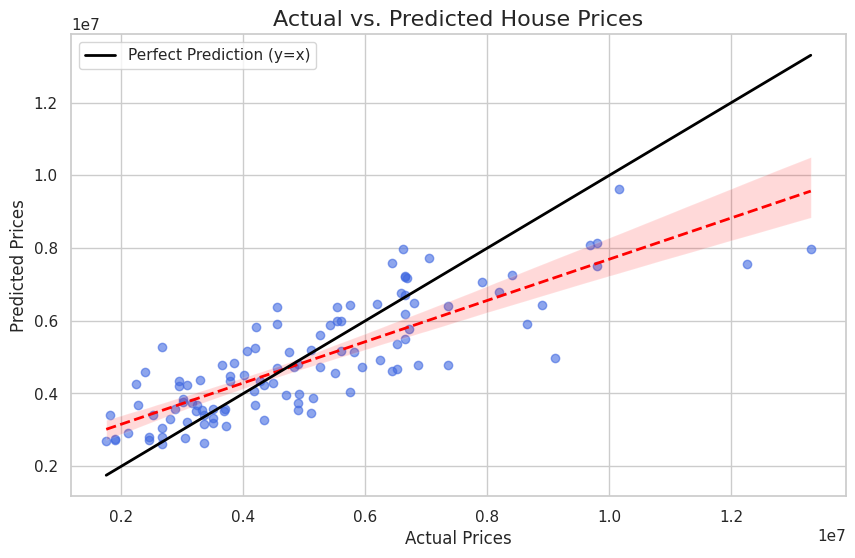

In [46]:
# --- Block 10: Visualize Predictions ---

print("--- Visualizing Actual vs. Predicted Prices ---")

plt.figure(figsize=(10, 6))

# Scatter plot of actual (y_test) vs. predicted (y_pred)
# The regplot adds a regression line (red dashed) to show the general trend
sns.regplot(x=y_test, y=y_pred,
            scatter_kws={'alpha':0.6, 'color': 'royalblue'},
            line_kws={'color':'red', 'linestyle':'--', 'linewidth': 2})

# Add a 45-degree line for reference (perfect prediction)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val],
         color='black', linestyle='-', linewidth=2, label='Perfect Prediction (y=x)')

plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs. Predicted House Prices", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()